C:\Users\namit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\namit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\namit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


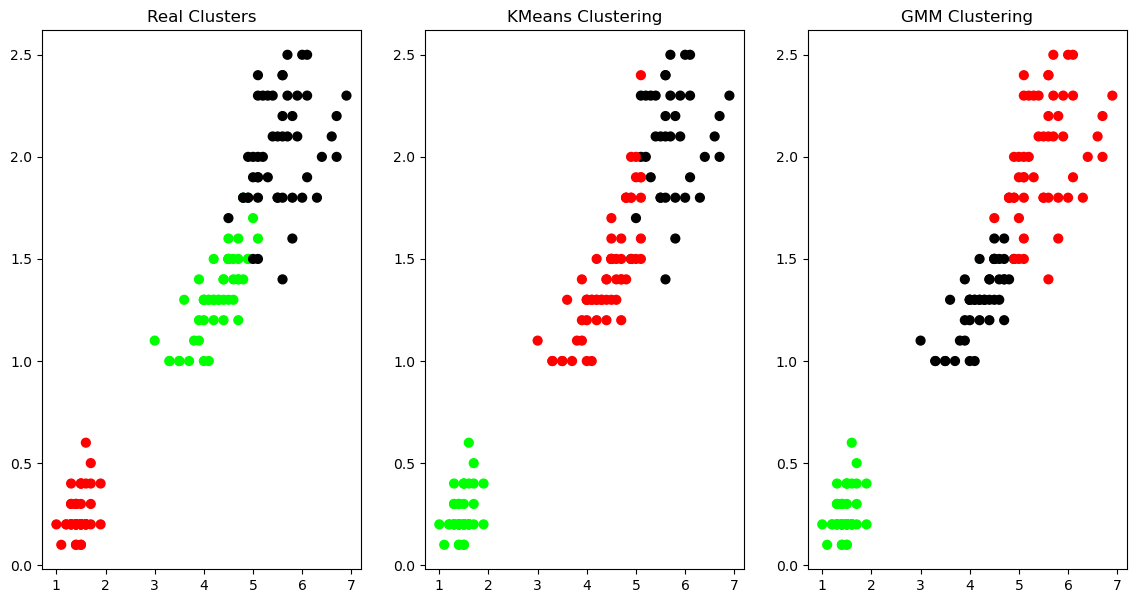

In [1]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris 
import sklearn.metrics as sm
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Load the iris dataset
dataset = load_iris()
X = pd.DataFrame(dataset.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'] 
y = pd.DataFrame(dataset.target)
y.columns = ['Targets']

# Visualize the clustering results
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')

# Plot the Models Classifications using KMeans
plt.subplot(1, 3, 2)
model = KMeans(n_clusters=3)
model.fit(X)
predy = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('KMeans Clustering')

# Transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
y['cluster_gmm'] = gmm.predict(xs)

# Plot the GMM Clustering
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.cluster_gmm], s=40) 
plt.title('GMM Clustering')

plt.show()
